<a href="https://colab.research.google.com/github/murphybrendan/code-concepts/blob/main/reinforcement_learning/01_intro/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning objectives:

*   What is reinforcement learning?
*   What is an environment?
*   What is an agent?
*   How do I train an agent?

Reinforcement learning is a field of machine learning where *agents* are trained to *maximize their cumulative reward* from their environment. You can think of this like playing a video game where you want to get the highest score possible. So, let's do exactly that!

In [1]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 2s (118 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opengl is already the newest version (3.1.5+dfsg-1).
0 upgraded, 0 newly install

In [6]:
!pip install gymnasium[box2d] stable-baselines3 swig

  Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Using cached stable_baselines3-2.3.2-py3-none-any.whl (182 kB)
  Using cached swig-4.2.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.9 MB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cuso

Let's play a game. The object of the game is to reach the goal without falling off the cliff.

In [21]:
from stable_baselines3.common.env_util import make_vec_env
from gymnasium.wrappers import TimeLimit
env = make_vec_env("LunarLander-v2", n_envs=16)

DependencyNotInstalled: Box2D is not installed, run `pip install gymnasium[box2d]`

In [16]:
from stable_baselines3 import PPO

agent = PPO("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [19]:
agent.learn(total_timesteps=100000)

-----------------------------
| time/              |      |
|    fps             | 673  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 547         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007868087 |
|    clip_fraction        | 0.0955      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 1.49e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0141      |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.00256    |
|    value_loss           | 0.0198      |
-----------------------------------------
----------------------------------

KeyboardInterrupt: 

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate(frames):
    fig, ax = plt.subplots()
    ax.axis('off')
    im = ax.imshow(frames[0])

    def update(frame):
        im.set_array(frame)
        return [im]

    ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

    video = HTML(ani.to_html5_video())
    plt.close(fig)
    return video

In [18]:
env = gym.make('CliffWalking-v0', render_mode='rgb_array')
observation, info = env.reset()
frames = []
import numpy as np
for _ in range(100):
    frames.append(env.render())
    action, _ = agent.predict(observation)
    observation, reward, terminated, truncated, info = env.step(int(action))
    if terminated or truncated:
        observation, info = env.reset()

animate(frames)

In [14]:
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

eval_env = Monitor(gym.make("CliffWalking-v0"))
mean_reward, std_reward = evaluate_policy(agent, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

KeyboardInterrupt: 

You're only able to take 1 of 4 actions: move up, down, left, right.

In [27]:
env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(4)

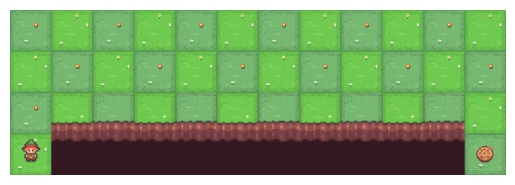

In [22]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

observation, info = env.reset()

def display_frame(frame):
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

display_frame(env.render())

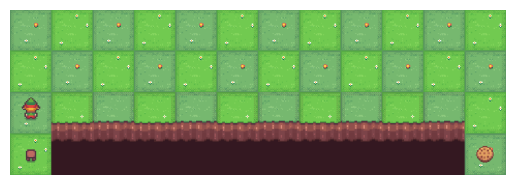

In [26]:
action = env.action_space.sample()
env.step(action)
display_frame(env.render())

In [8]:
timesteps = 100
observation, info = env.reset()
frames = []

for _ in range(timesteps):
    frames.append(env.render())
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()

In [15]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate(frames):
    fig, ax = plt.subplots()
    ax.axis('off')
    im = ax.imshow(frames[0])

    def update(frame):
        im.set_array(frame)
        return [im]

    ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

    video = HTML(ani.to_html5_video())
    plt.close(fig)
    return video

animate(frames)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'frames' is not defined

Our policy, choosing a random action, doesn't seem to be getting us very far.

In [24]:
def train(timesteps):
    observation, info = env.reset()
    rewards = []
    cumulative_reward = 0
    for _ in range(timesteps):
        frames.append(env.render())
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        cumulative_reward += reward
    return cumulative_reward, frames

cumulative_reward, frames = train(100)
print(f"Return: {cumulative_reward}")
animate(frames)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Return: -1090


In [ ]:
class RandomAgent

    def __init__(self, env):
        self.env = env

    def predict(self, observation):
        return self.env.action_space.sample()

    def learn(self, timesteps):
        observation, info = env.reset()
        for _ in range(timesteps):
            action = self.predict(observation)
            observation, reward, terminated, truncated, info = env.step(action)
            if terminated or truncated:
                observation, info = env.reset()